Importing Necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Load up the data

Heart Disease DataSet

In [2]:
heart_csv=pd.read_csv('heart_statlog_cleveland_hungary_final (1).csv')
heart_csv.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [3]:
heart_csv.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
duplicated=heart_csv.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are : {}'.format(duplicated))
else:
        print('no values duplicated in dataset')

Duplicated rows in dataset are : 272


In [5]:
heart_csv = heart_csv.drop_duplicates()

In [6]:
duplicated=heart_csv.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are : {}'.format(duplicated))
else:
        print('no values duplicated in dataset')

no values duplicated in dataset


In [7]:
heart_csv.shape

(918, 12)

In [8]:
heart_csv.describe()

age         sex  chest pain type  resting bp s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046     0.805968       25.460334         0.490992   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      120.000000         0.000000   
50%               0.000000     0.000000      138.000000         0.000000   
75%               0.000000     1.000000      156.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

          oldpeak    ST slope      target  
count  918.000000  918.000000  918.000000  
mean     0.887364    1.636166    0.553377  
std      1.066570    0.609341    0.497414  
min     -2.600000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.600000    2.000000    1.000000  
75%      1.500000    2.000000    1.000000  
max      6.200000    3.000000    1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

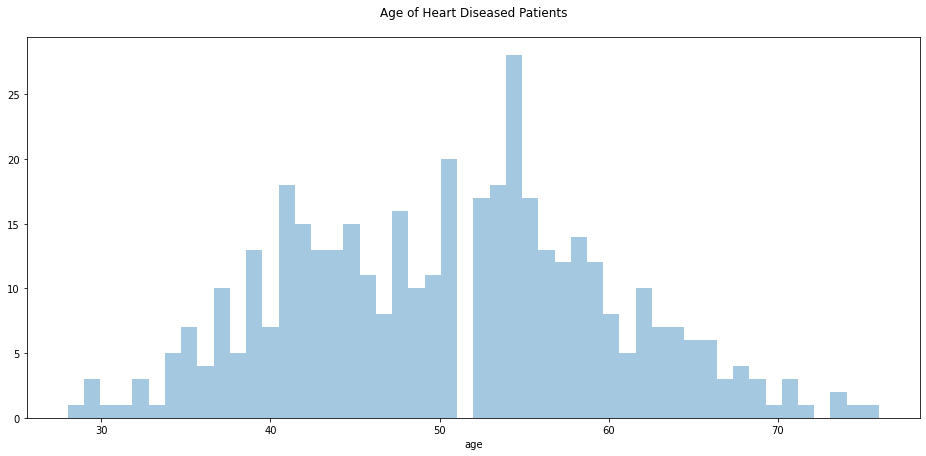

In [9]:
plt.figure(figsize=(16,7))
sns.distplot(heart_csv[heart_csv['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

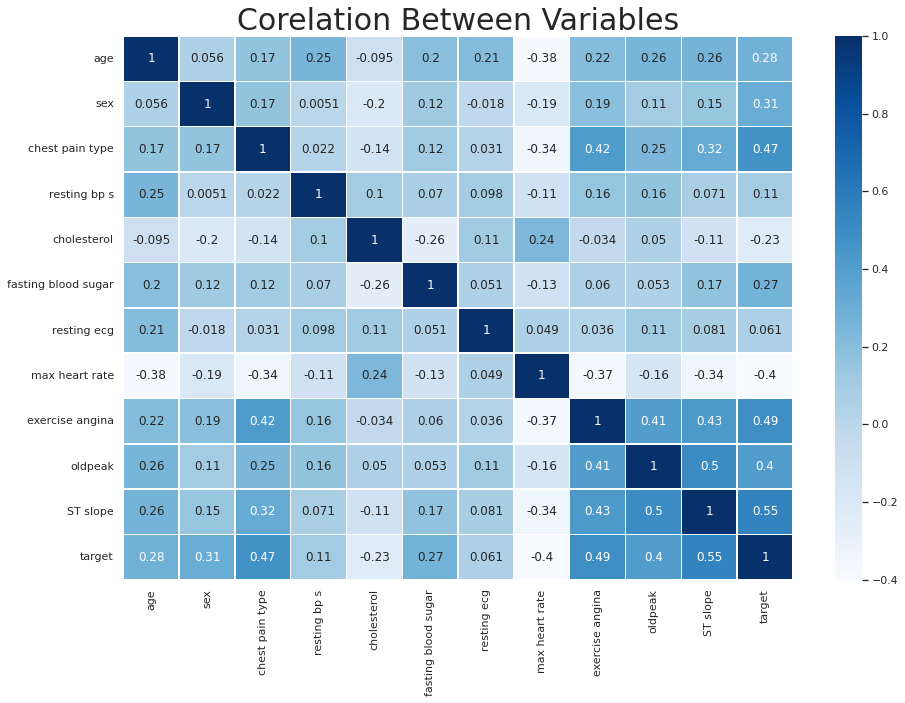

In [10]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(heart_csv.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff91f394550>,
      dtype=object)

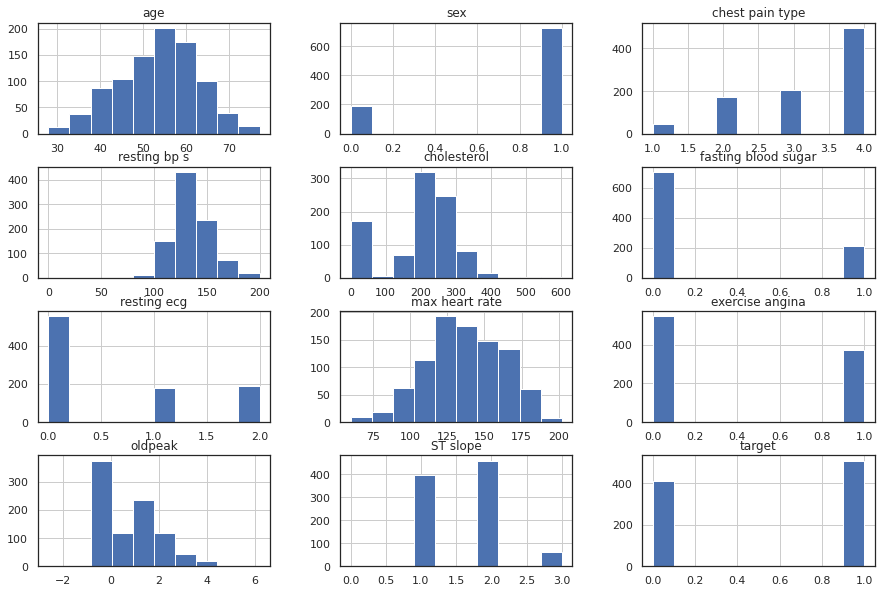

In [11]:
heart_csv.hist()

Text(0.5, 1.0, 'Count of each Target Class')

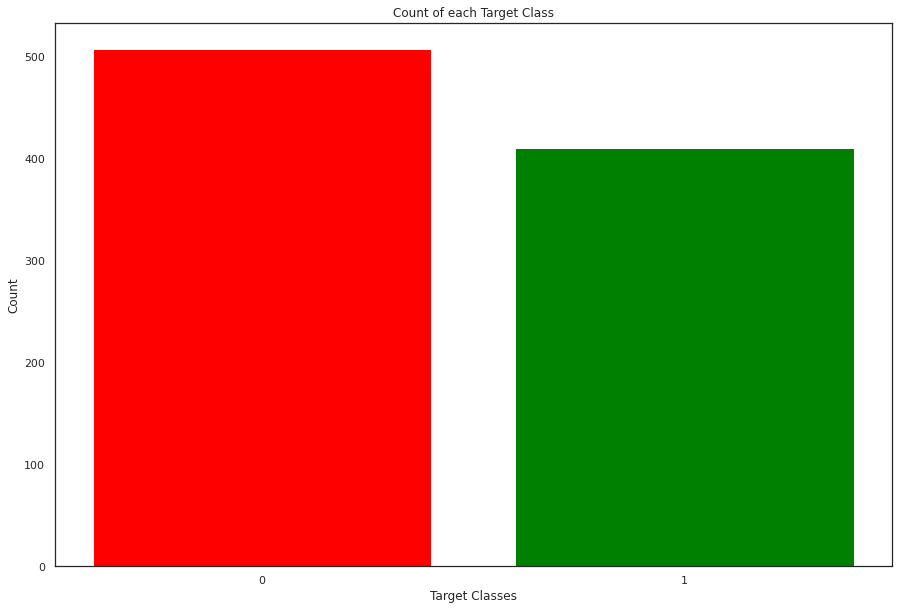

In [12]:
plt.bar(heart_csv['target'].unique(), heart_csv['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [13]:
y = heart_csv['target']

X = heart_csv.drop(['target'], axis = 1)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

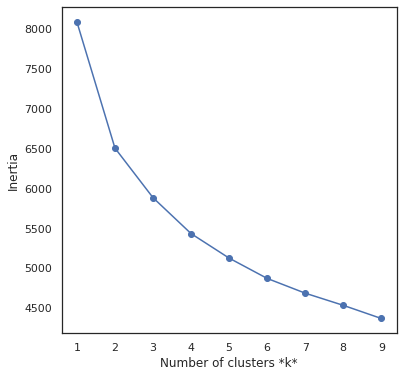

In [15]:
from sklearn.cluster import KMeans

sse = []

list_k = list(range(1, 10))

for k in list_k:

    km = KMeans(n_clusters=k)

    km.fit(X_train)

    sse.append(km.inertia_)

# Plot sse against k

plt.figure(figsize=(6, 6))

plt.plot(list_k, sse, '-o')

plt.xlabel(r'Number of clusters *k*')

plt.ylabel('Inertia');

In [16]:
centroids = km.cluster_centers_
centroids

array([[ 0.08064651,  0.30797652,  0.5674515 , -0.82198541, -1.78959822,
         1.73358555, -0.4335643 , -0.52869571, -0.02915876, -0.0946756 ,
         0.51392794],
       [-0.52041939, -1.93816322, -0.73277724, -0.22440083,  0.34825232,
        -0.35883322, -0.51821772,  0.57274572, -0.70507941, -0.53464148,
        -0.68182088],
       [ 0.61500335,  0.19114299,  0.6620069 ,  0.56826698,  0.40780217,
        -0.37743695,  0.94864537, -0.24679094,  0.82466621,  1.74457228,
         1.0320699 ],
       [-0.28927244,  0.51595242,  0.58640457, -0.20692459,  0.17822364,
        -0.48741972, -0.54786824,  0.16202897, -0.76848056, -0.61312078,
        -0.44547867],
       [-0.74452129,  0.51595242, -1.22375265, -0.19532225,  0.19532357,
        -0.36060749, -0.44883601,  0.73799417, -0.69208518, -0.55856891,
        -0.79299227],
       [-0.2089718 ,  0.09023848,  0.58492268,  0.01000421,  0.50137577,
        -0.52720767, -0.58450144, -0.46528983,  1.08948266,  0.51440532,
         0.580

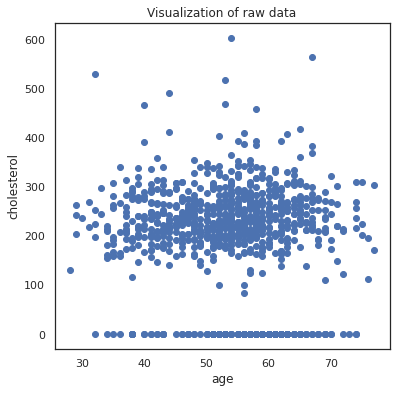

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(heart_csv.age, heart_csv.cholesterol)
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.title('Visualization of raw data');

Accuracy:0.8242506811989101
[[270  54]
 [ 75 335]]


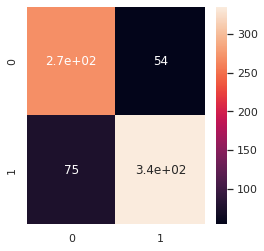

In [19]:
k_means = KMeans(n_clusters=2)

k_means.fit(X_train)

pred_train_kmeans = k_means.predict(X_train)

score_train_kmeans = accuracy_score(y_train,pred_train_kmeans)

print(f'Accuracy:{score_train_kmeans}')


print(confusion_matrix(y_train,pred_train_kmeans))

plt.figure(figsize=(4, 4))

sns.heatmap(confusion_matrix(y_train,pred_train_kmeans),annot=True)

plt.show()

Accuracy of testing: 0.8260869565217391
[[75 11]
 [21 77]]


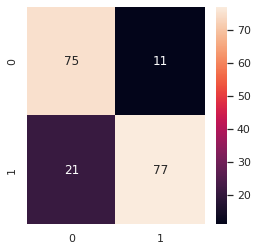

In [20]:
pred_test_kmeans = k_means.predict(X_test)

accu_test_kmeans =accuracy_score(y_test,pred_test_kmeans)

print(f'Accuracy of testing: {accu_test_kmeans}')

print(confusion_matrix(y_test,pred_test_kmeans))

plt.figure(figsize =(4, 4))

sns.heatmap(confusion_matrix(y_test,pred_test_kmeans),annot=True)

plt.show()

In [21]:
k_means.cluster_centers_

array([[-0.45173476, -0.2451791 , -0.57568872, -0.1967131 ,  0.24901657,
        -0.26341615, -0.1302686 ,  0.58910473, -0.69951615, -0.56731833,
        -0.68287238],
       [ 0.40691165,  0.25729241,  0.50311496,  0.15250673, -0.24379734,
         0.23297195,  0.12204857, -0.53146958,  0.63800376,  0.48620732,
         0.61008334]])

In [22]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(734, 11) (734,) (184, 11) (184,)


In [39]:
classifier_svm = SVC(kernel = 'rbf', C=0.5, gamma='auto')
CV = 10 # choose number of folds
scores = cross_val_score(classifier_svm, X_train, y_train, scoring='accuracy', cv=CV)

print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")



0.8609218807848944 accuracy with a standard deviation of 0.041747722388568845


In [40]:
scores_test_svm = cross_val_score(classifier_svm, X_test, y_test, scoring='accuracy', cv=CV)
print(f"Accuracy of SVM (CV={CV}) on the test set: {scores_test_svm}")
print(scores_test_svm.mean())

Accuracy of SVM (CV=10) on the test set: [0.84210526 0.94736842 0.84210526 0.68421053 0.77777778 0.94444444
 1.         0.88888889 0.88888889 0.72222222]
0.8538011695906432


In [37]:
LDA= LinearDiscriminantAnalysis()
CV = 5
scores_LDA = cross_val_score(LDA, X_train, y_train, scoring='accuracy', cv=CV)
print(f"{scores_LDA.mean()} accuracy with a standard deviation of {scores_LDA.std()}")


0.8474419904948279 accuracy with a standard deviation of 0.02859225302020909


In [38]:
scores_test_lda = cross_val_score(LDA, X_test, y_test, scoring='accuracy', cv=CV)
print(f"Accuracy of LDA (CV={CV}) on the test set: {scores_test_lda}")
print(scores_test_lda.mean())

Accuracy of LDA (CV=5) on the test set: [0.86486486 0.72972973 0.83783784 0.91891892 0.80555556]
0.8313813813813814
